In [10]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 677.4 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
names_df = pd.read_csv('MTeams.csv')
results_tournament_df = pd.read_csv('MNCAATourneyDetailedResults.csv')
results_regular_df = pd.read_csv('MRegularSeasonDetailedResults.csv')

display(names_df,results_tournament_df,results_regular_df)

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025
...,...,...,...,...
375,1476,Stonehill,2023,2025
376,1477,East Texas A&M,2023,2025
377,1478,Le Moyne,2024,2025
378,1479,Mercyhurst,2025,2025


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,146,1301,76,1181,64,N,0,28,60,...,20,21,26,10,27,11,9,4,5,23
1378,2024,146,1345,72,1397,66,N,0,24,53,...,26,7,11,6,17,17,6,8,4,25
1379,2024,152,1163,86,1104,72,N,0,31,62,...,23,9,11,7,21,9,7,2,5,15
1380,2024,152,1345,63,1301,50,N,0,22,55,...,19,3,4,6,22,10,11,8,3,13


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,106,1461,69,1102,62,H,0,25,54,...,23,9,17,2,24,12,8,3,3,24
117744,2025,106,1462,76,1139,63,H,0,29,68,...,23,9,14,4,31,12,20,5,2,12
117745,2025,106,1466,80,1480,62,H,0,28,55,...,18,4,8,6,23,13,13,2,2,18
117746,2025,106,1468,94,1122,68,H,0,36,58,...,32,17,22,7,22,12,10,2,5,17


In [33]:
since_2020 = results_regular_df[results_regular_df['Season'] >= 2020]
since_2020_tourney = results_tournament_df[results_tournament_df['Season'] >= 2020]
since_2020['MOV'] = since_2020['WScore'] - since_2020['LScore']
since_2020_tourney['MOV'] = since_2020_tourney['WScore'] - since_2020_tourney['LScore']
for col in results_regular_df.iloc[:,8:34].columns:
    if abs(since_2020['MOV'].corr(since_2020[col])) >= 0.3 or abs(since_2020_tourney['MOV'].corr(since_2020_tourney[col])) >= 0.3:
        print(f"RS {col}: {since_2020['MOV'].corr(since_2020[col])}")
        print(f"PL {col}: {since_2020_tourney['MOV'].corr(since_2020_tourney[col])}")

RS WFGM: 0.48149138071097597
PL WFGM: 0.47466156749947963
RS WFGM3: 0.29940423654505843
PL WFGM3: 0.3613921749201252
RS WAst: 0.4373913235579526
PL WAst: 0.48941716158194876
RS LFGM: -0.3889928216694773
PL LFGM: -0.34137284347226793
RS LDR: -0.27190576148047496
PL LDR: -0.4311085636010913


/var/folders/2f/vcpyf1hn7nz25nw3pp729g0r0000gn/T/ipykernel_59841/1748823607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  since_2020['MOV'] = since_2020['WScore'] - since_2020['LScore']
/var/folders/2f/vcpyf1hn7nz25nw3pp729g0r0000gn/T/ipykernel_59841/1748823607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  since_2020_tourney['MOV'] = since_2020_tourney['WScore'] - since_2020_tourney['LScore']


MSE: 26.181841081163103


<function matplotlib.pyplot.show(close=None, block=None)>

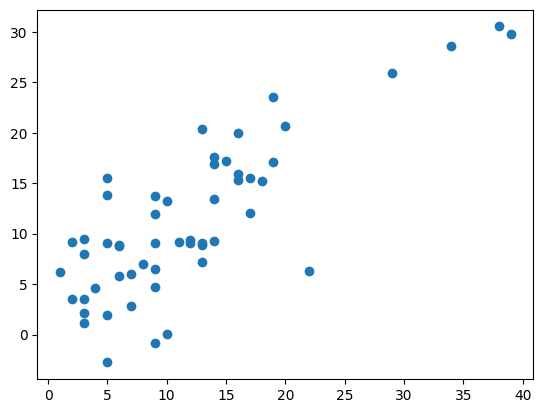

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = since_2020_tourney[['WFGM', 'WFGM3', 'WAst', 'LFGM', 'LDR']]
y = since_2020_tourney['MOV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
print('MSE:', mean_squared_error(y_test,y_hat))

plt.scatter(y_test,y_hat)
plt.show

In [52]:
bama_2024 = since_2020_tourney[(since_2020_tourney['Season'] == 2024) & ((since_2020_tourney['WTeamID'] == 1104) | (since_2020_tourney['LTeamID'] == 1104))]
wfgm = bama_2024['WFGM'].mean()
wfgm3 = bama_2024['WFGM3'].mean()
wast = bama_2024['WAst'].mean()
lfgm = 30
ldr = 24
display(bama_2024)
new_data = pd.DataFrame({
    'WFGM': [wfgm],
    'WFGM3': [wfgm3],
    'WAst': [wast],
    'LFGM': [lfgm],
    'LDR': [ldr]
})
print(model.predict(new_data))


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,MOV
1335,2024,137,1104,109,1158,96,N,0,36,60,...,22,29,14,23,16,10,8,3,22,13
1359,2024,139,1104,72,1213,61,N,0,24,65,...,23,37,12,24,5,13,10,8,21,11
1367,2024,143,1104,89,1314,87,N,0,32,67,...,15,17,17,21,17,7,8,3,18,2
1375,2024,145,1104,89,1155,82,N,0,29,62,...,8,16,8,20,15,6,6,2,20,7
1379,2024,152,1163,86,1104,72,N,0,31,62,...,9,11,7,21,9,7,2,5,15,14


[8.330883]


In [69]:
regular_season_stats = results_regular_df.drop(['WLoc'],axis=1).groupby(['Season', 'WTeamID']).mean().reset_index().drop(['LTeamID'],axis=1)
regular_season_stats
results_tournament_df['MOV'] = results_tournament_df['WScore'] - results_tournament_df['LScore']
playoff_stats = results_tournament_df.drop(['WLoc'],axis=1).groupby(['Season', 'WTeamID']).mean().reset_index().drop(['LTeamID'],axis=1)
#display(playoff_stats,regular_season_stats)

merged_stats = pd.merge(
    regular_season_stats,
    playoff_stats,
    on=['Season', 'WTeamID'],
    suffixes=('_Regular', '_Postseason')
)

for col in ['WFGM', 'WFGM3', 'WAst', 'LFGM', 'LDR']:
    merged_stats[f'{col}_Diff'] = merged_stats[f'{col}_Postseason'] - merged_stats[f'{col}_Regular']

print(merged_stats[['Season', 'WTeamID', 'WFGM_Diff', 'WFGM3_Diff', 'WAst_Diff', 'LFGM_Diff', 'LDR_Diff']].head())

   Season  WTeamID  WFGM_Diff  WFGM3_Diff  WAst_Diff  LFGM_Diff  LDR_Diff
0    2003     1112   3.026667   -0.080000   1.466667   0.213333  4.106667
1    2003     1113   1.944444    2.444444   1.055556   2.166667  3.555556
2    2003     1120  -2.921053   -0.236842  -4.421053  -1.842105  2.789474
3    2003     1139  -1.791667    1.041667  -0.583333  -0.208333  1.041667
4    2003     1141   1.043478   -4.217391  -1.739130   0.782609 -0.739130


In [74]:
regular_season_stats['MOV']

0       15.583333
1        9.384615
2       13.176471
3       13.000000
4       10.384615
          ...    
7967     8.833333
7968     8.333333
7969     6.571429
7970     5.700000
7971     8.500000
Name: MOV, Length: 7972, dtype: float64

In [78]:
new_model = LinearRegression()
X = merged_stats[['WFGM_Regular', 'WFGM3_Regular', 'WAst_Regular', 'LFGM_Regular', 'LDR_Regular', 'WFGM_Diff', 'WFGM3_Diff', 'WAst_Diff', 'LFGM_Diff', 'LDR_Diff']]
y = merged_stats[['WFGM_Postseason', 'WFGM3_Postseason', 'WAst_Postseason', 'LFGM_Postseason', 'LDR_Postseason']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

new_model.fit(X_train,y_train)
new_model.predict(X_test)
X_test

,WFGM_Regular,WFGM3_Regular,WAst_Regular,LFGM_Regular,LDR_Regular,WFGM_Diff,WFGM3_Diff,WAst_Diff,LFGM_Diff,LDR_Diff
600,31.000000,8.400000,18.333333,23.533333,19.666667,-10.000000,-1.400000,-6.333333,-2.533333,3.333333
693,29.083333,8.666667,16.666667,23.458333,20.333333,-5.083333,0.000000,-1.000000,-3.791667,-1.666667
467,29.333333,7.791667,15.583333,23.458333,23.708333,-2.333333,-3.791667,-2.583333,1.541667,-2.708333
394,24.840000,5.880000,14.480000,21.840000,23.880000,6.160000,3.120000,1.520000,6.160000,9.120000
622,28.482759,8.000000,17.137931,18.827586,19.793103,-1.816092,0.333333,-3.471264,1.505747,0.873563
...,...,...,...,...,...,...,...,...,...,...
311,25.142857,5.761905,14.809524,19.809524,19.714286,-4.142857,-3.761905,-2.809524,2.190476,1.285714
376,24.531250,7.031250,13.718750,20.406250,21.000000,-0.281250,-1.781250,-0.718750,0.843750,0.250000
63,29.947368,7.684211,16.842105,25.421053,21.263158,-1.447368,-0.684211,-1.342105,3.578947,0.736842
187,29.678571,8.857143,18.964286,24.464286,23.964286,-5.678571,-3.357143,-6.464286,-2.964286,-1.464286


In [19]:
import pandas as pd


wins = results_df.groupby(['Season', 'WTeamID']).size().reset_index(name='Wins')
losses = results_df.groupby(['Season', 'LTeamID']).size().reset_index(name='Losses')

team_results = pd.merge(wins, losses, left_on=['Season', 'WTeamID'], right_on=['Season', 'LTeamID'], how='outer').fillna(0)

# Clean up the merged DataFrame
team_results['TeamID'] = team_results['WTeamID'].where(team_results['WTeamID'] != 0, team_results['LTeamID'])
team_results = team_results.drop(columns=['WTeamID', 'LTeamID'])

team_results['TotalGames'] = team_results['Wins'] + team_results['Losses']

team_results['WinPercentage'] = (team_results['Wins'] / team_results['TotalGames']) * 100

results_df = pd.merge(results_df, team_results[['Season', 'TeamID', 'WinPercentage']], left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
results_df = results_df.rename(columns={'WinPercentage': 'WTeamWinPercentage'})
results_df = pd.merge(results_df, team_results[['Season', 'TeamID', 'WinPercentage']], left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left')
results_df = results_df.rename(columns={'WinPercentage': 'LTeamWinPercentage'})
results_df = results_df.drop(columns=['TeamID_x', 'TeamID_y'])
print(results_df.head())

   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  \
0    1985     136     1116      63     1234      54    N      0   
1    1985     136     1120      59     1345      58    N      0   
2    1985     136     1207      68     1250      43    N      0   
3    1985     136     1229      58     1425      55    N      0   
4    1985     136     1242      49     1325      38    N      0   

   WTeamWinPercentage  LTeamWinPercentage  
0           50.000000                 0.0  
1           66.666667                 0.0  
2           83.333333                 0.0  
3           50.000000                 0.0  
4           50.000000                 0.0  


In [15]:
wins

,Season,WTeamID,Wins
0,1985,1104,2
1,1985,1116,1
2,1985,1120,2
3,1985,1130,2
4,1985,1181,1
...,...,...,...
1292,2024,1401,1
1293,2024,1429,1
1294,2024,1447,1
1295,2024,1450,1
